# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

Proyecto Estadística - Análisis dataset Pokémon

Para este proyecto he decidido quedarme con uno de los primeros datasets que mostraste en tus clases, he elegido el de Pokémon, pero para que tuviera datos suficientes he escogido el correspondiente a las generaciones 1 a 9. El dataset se obtiene de kaggle con unos 1000 registros, lo que permite aplicar técnicas estadísticas descriptivas, inferenciales y de modelado con garantías.

El dataset dispone tanto de variables cuantitativas, que nos permiten aplicar técnicas estadísticas descriptivas o análisis de dispersión y cualitativas, que nos permiten facilitar la comparación de métricas entre grupos y el estudio de diferencias entre categorías

Seleccionaré la variable speed como variable objetivo, al tratarse de una variable numérica clara, interpretable y no derivada directamente del resto de predictores, lo que permite evaluar relaciones estadísticas reales mediante regresión.

Creo que este dataset pese a poder considerarse un poco friki, creo que es bastante adecuado para un análisis estadístico completo por todas las razones mostradas anteriormente, además de acercarse a mis gustos personales que ayudan a la hora de desarrollar el proyecto

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Carga del dataset
df = pd.read_csv("pokemon.csv")  

# Mostrar información del dataset
df.shape
df.info()
# Mostrar datos de ejemplo de nuestro dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,Number of Evolution,Color ID,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,3,green,45,7,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,3,green,45,10,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,3,green,45,20,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,3,green,45,24,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,3,red,45,6,85,24,19,309,39,52,43,60,50,65


VARIABLES NOMINALES:
    - Name
    - Primary typing
    - Secondary typing
    - Color ID
    - Form
Representan categorías o etiquetas sin jerarquía ni relación de orden.

VARIABLES ORDINALES:
    - Evolution stage
    - Number of evolution
Existe una progresión natural entre los valores.

VARIABLES BINARIAS:
    - Legendary status
    - Secondary typing flag
    - Alt form flag
Variables categóricas con dos únicas categorías.

VARIABLES CUANTITATIVAS DIRECTAS:
    - Health
    - Attack
    - Defense
    - Special attack
    - Special defense
    - Speed
    - Base stat total
    - Catch rate
    - National dex #
Toman valores enteros y representan conteos o puntuaciones discretas.

VARIABLES CUANTITATIVAS DIRECTAS:
    - Height (dm)
    - Weight (hg)
    - Height (in)
    - Weight (lbs)
Representan magnitudes físicas medibles en escala continua, aunque se almacenen como enteros.

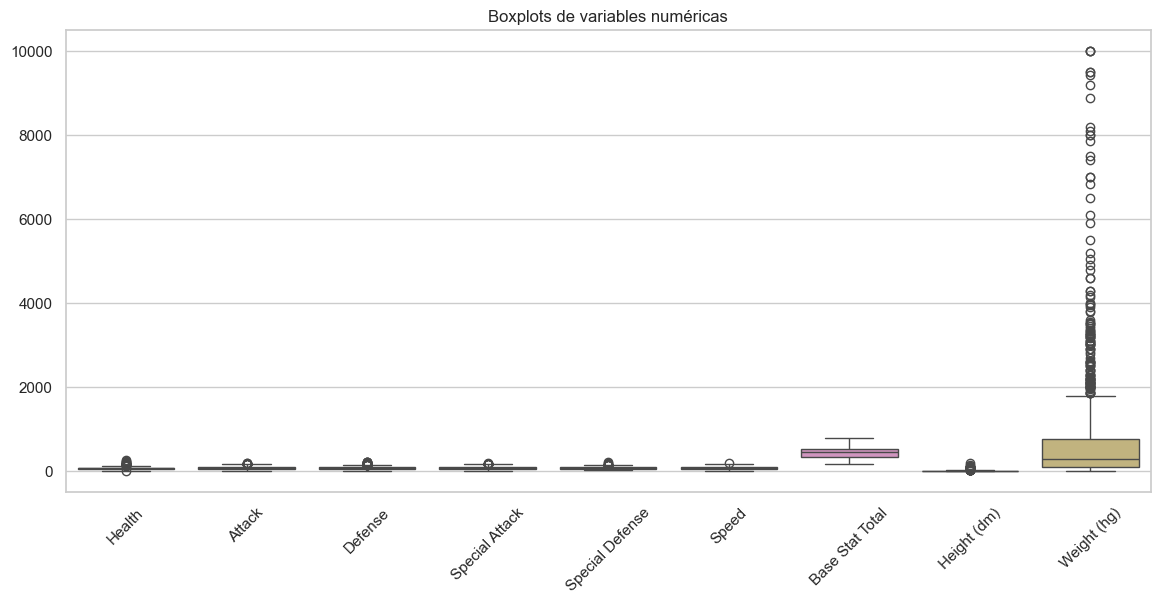

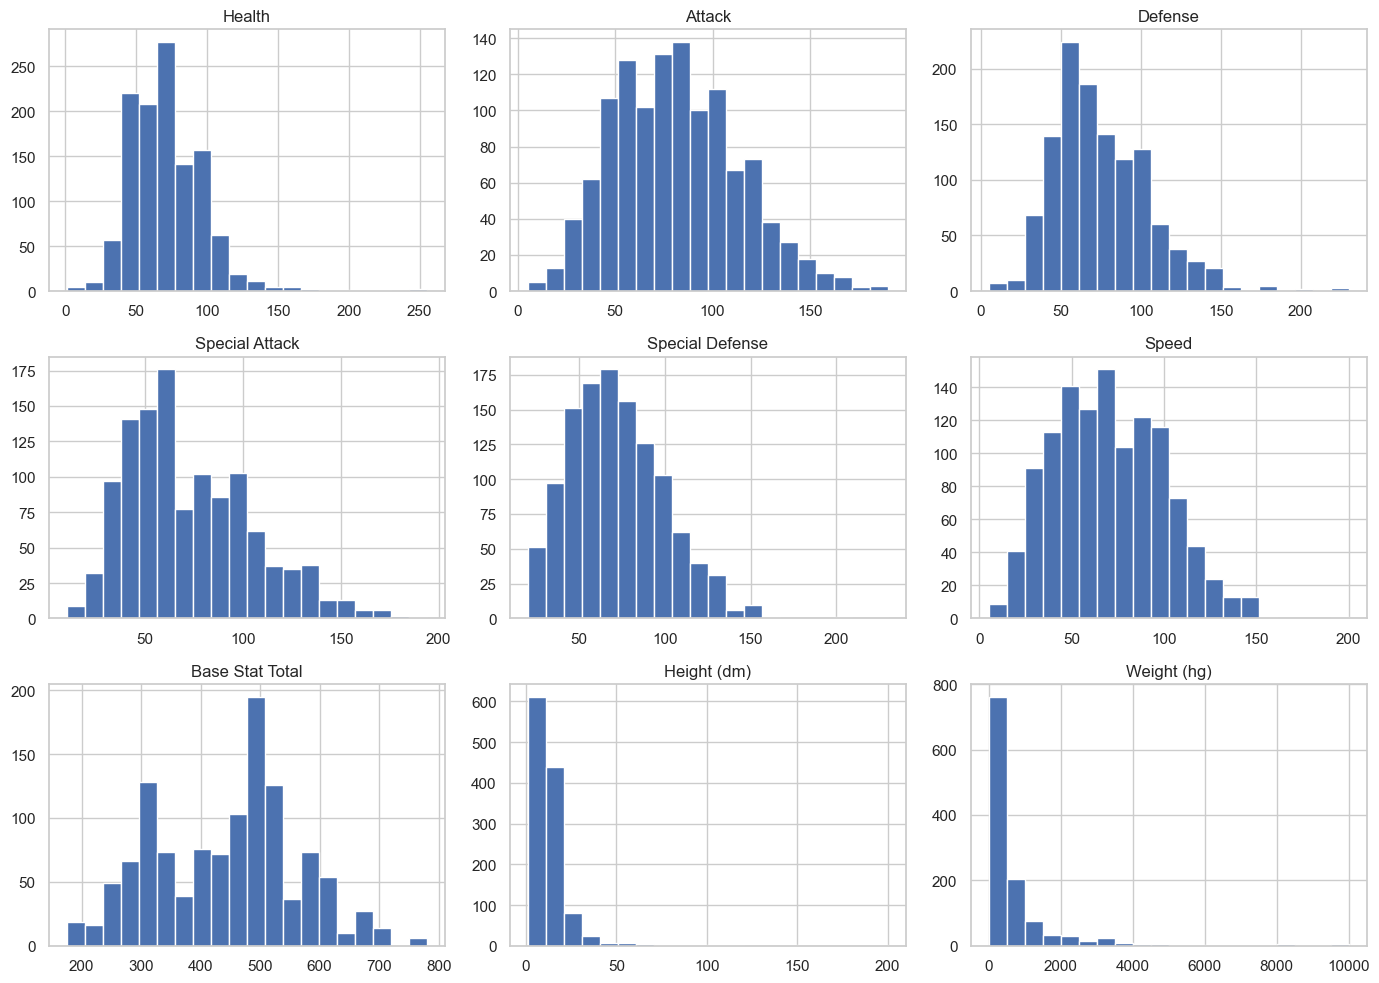

(count    1184.000000
 mean       69.728885
 std        30.110391
 min         5.000000
 25%        45.000000
 50%        67.500000
 75%        91.000000
 max       200.000000
 Name: Speed, dtype: float64,
 count    1183.000000
 mean       69.618766
 std        29.883659
 min         5.000000
 25%        45.000000
 50%        67.000000
 75%        90.500000
 max       160.000000
 Name: Speed, dtype: float64)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("pokemon.csv")
# .describe
numeric_vars = [
    "Health",
    "Attack",
    "Defense",
    "Special Attack",
    "Special Defense",
    "Speed",
    "Base Stat Total",
    "Height (dm)",
    "Weight (hg)"
]

df[numeric_vars].describe()

# Boxplots para detectar visualmente outliers
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numeric_vars])
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()

# Cálculo del IQR para la variable Speed
Q1 = df["Speed"].quantile(0.25)
Q3 = df["Speed"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers en Speed
outliers_speed = df[
    (df["Speed"] < lower_bound) | (df["Speed"] > upper_bound)
]
outliers_speed.shape[0]

# Histogramas de las variables numéricas principales
df[numeric_vars].hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

# Cálculo de valores nulos y porcentaje
null_count = df.isnull().sum()
null_percent = (null_count / len(df)) * 100
null_analysis = pd.DataFrame({
    "Nulos": null_count,
    "Porcentaje (%)": null_percent
})
null_analysis.sort_values("Porcentaje (%)", ascending=False)

# Comparación de rangos y dispersión
df[numeric_vars].agg(["min", "max", "mean", "std"])

# Comparación entre grupos del dataset
df.groupby("Legendary Status")["Speed"].describe()
df.groupby("Primary Typing")["Speed"].mean().sort_values(ascending=False)

# Skewness y kurtosis de Speed
speed_skewness = df["Speed"].skew()
speed_kurtosis = df["Speed"].kurtosis()
speed_skewness, speed_kurtosis

# Comparación de estadísticos de Speed con y sin outliers
speed_no_outliers = df[
    (df["Speed"] >= lower_bound) & (df["Speed"] <= upper_bound)
]["Speed"]
df["Speed"].describe(), speed_no_outliers.describe()


¿Qué podemos sacar de aquí?

En primer lugar, el análisis de valores nulos muestra que no existen valores faltantes en las variables numéricas utilizadas en el estudio. La única variable con presencia de valores nulos es Secondary Typing, lo cual responde a una característica estructural del dataset, ya que muchos Pokémon solo poseen un tipo. Por tanto, estos valores no se consideran errores ni suponen un problema para el análisis estadístico.

En cuanto a la distribución de las variables numéricas, tanto los histogramas como los boxplots indican que la mayoría de las estadísticas presentan asimetría positiva. Este comportamiento se observa claramente al comparar la media y la mediana, siendo la media ligeramente superior en variables como Speed, Attack o Base Stat Total. Este patrón sugiere la presencia de valores altos que desplazan la media hacia la derecha, lo que concuerda con la existencia de Pokémon con estadísticas excepcionalmente elevadas.

La detección de valores atípicos, realizada mediante boxplots y el criterio del IQR, confirma la presencia de outliers en varias variables. En particular, Weight (hg) presenta un número muy elevado de valores extremos, con pesos que alcanzan cifras muy superiores al resto del conjunto de datos. Estos outliers no parecen deberse a errores de medición, sino a características reales de determinados Pokémon, como formas especiales o Pokémon de gran tamaño. De forma similar, aunque en menor medida, también se detectan valores atípicos en variables como Speed y Base Stat Total.

El análisis de escalas y rangos muestra que las variables numéricas presentan magnitudes muy distintas. Mientras que estadísticas como Health, Attack o Speed se mueven en rangos relativamente acotados, variables físicas como Weight (hg) presentan una dispersión mucho mayor. Esta diferencia de escalas podría tener implicaciones en fases posteriores de modelado, donde sería recomendable considerar técnicas de estandarización o normalización.

Al analizar las métricas por categorías, se observan diferencias claras entre grupos del dataset. En particular, los Pokémon legendarios presentan, de media, valores de Speed superiores a los no legendarios, lo que refuerza la idea de que esta variable está influida por características propias del diseño del juego. Asimismo, se aprecian diferencias entre tipos primarios, lo que sugiere que las variables categóricas podrían aportar información relevante en el análisis predictivo.

El cálculo de la asimetría (skewness) de la variable Speed confirma cuantitativamente lo observado en los histogramas: la distribución presenta una asimetría positiva moderada, coherente con una mayor concentración de valores en la parte central y una cola más larga hacia valores altos. La curtosis indica, además, una distribución con mayor concentración alrededor de la media en comparación con una distribución normal.

Desde el punto de vista del impacto potencial de los outliers, se observa que estos valores extremos influyen en la varianza y en la media de las variables, especialmente en Speed y Weight. En un modelo predictivo, estos outliers podrían afectar a la estimación de los coeficientes y al ajuste del modelo, por lo que será necesario analizar los residuos y validar los supuestos en fases posteriores, sin eliminar estos valores de forma arbitraria.

En conjunto, el dataset presenta una buena calidad global, con datos completos, variabilidad suficiente y un contexto bien definido. Aunque existen asimetrías y valores atípicos, estos responden a características reales del fenómeno estudiado y no a errores de los datos. Por tanto, el dataset puede considerarse listo para el modelado, si bien será necesario tener en cuenta la presencia de outliers y las diferencias de escala entre variables en los análisis posteriores.

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

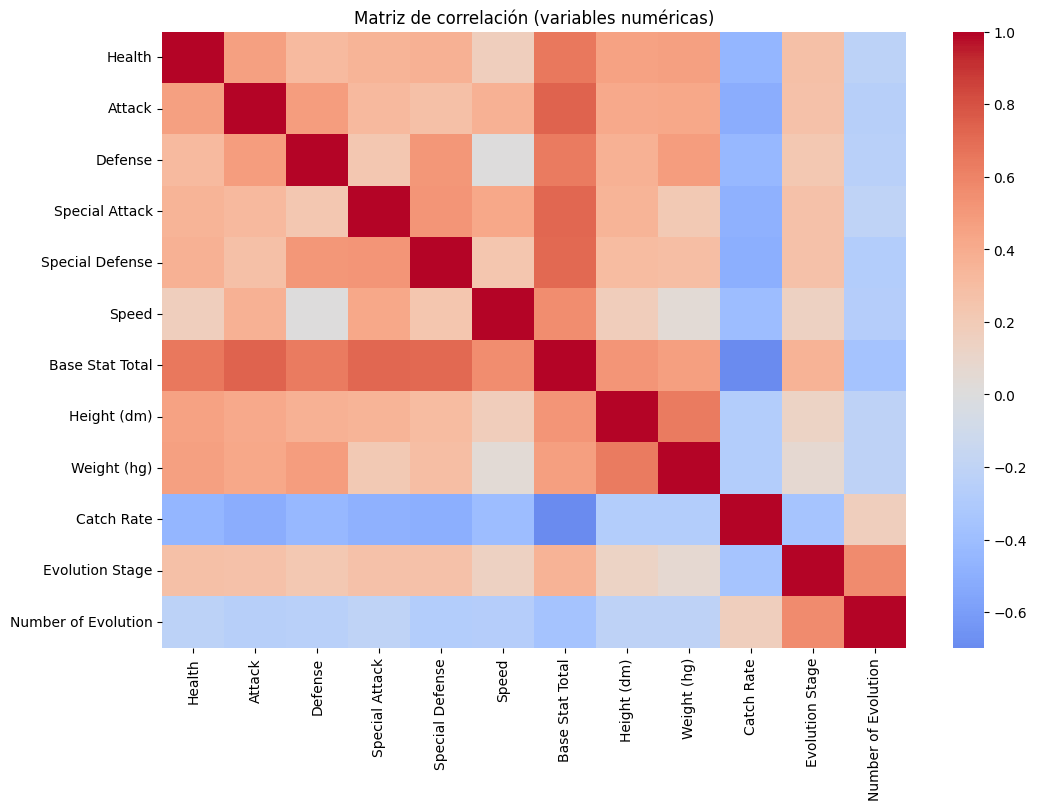

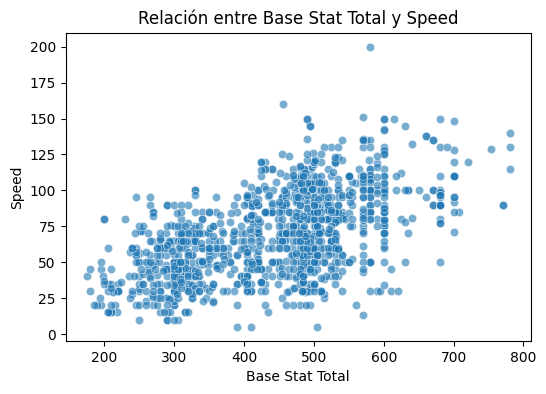

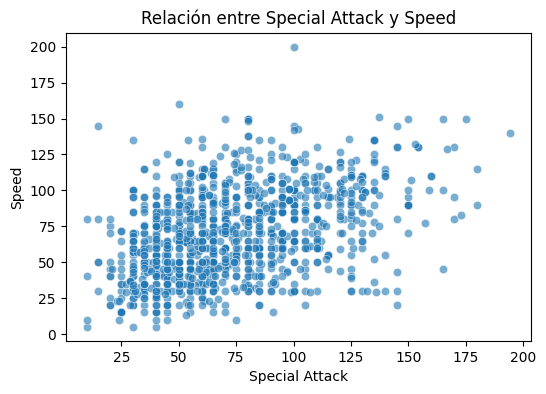

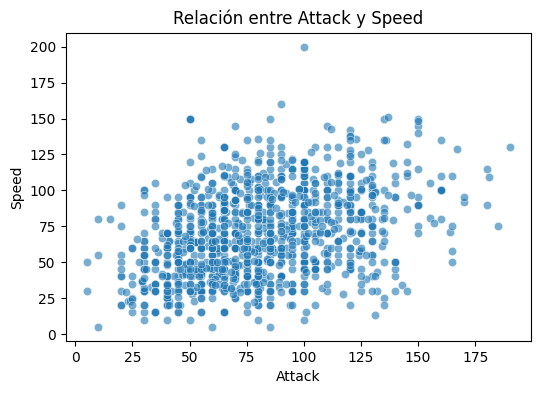

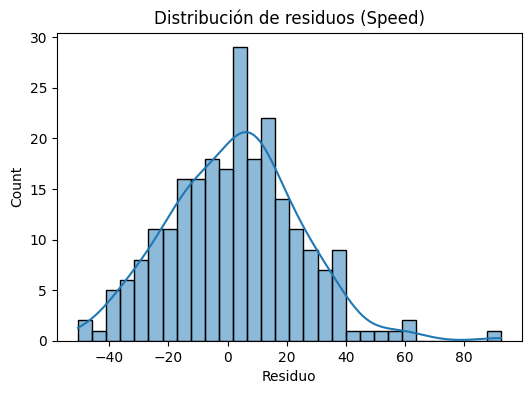

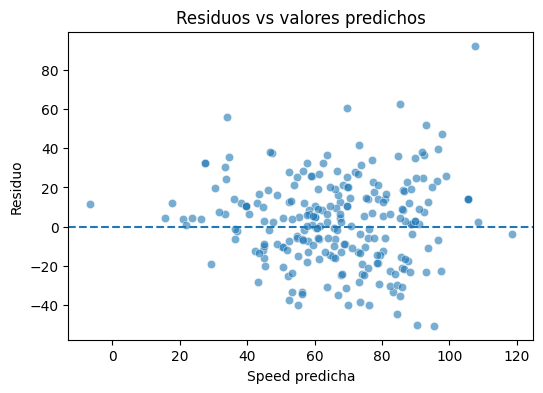

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       197
           1       0.79      0.75      0.77        40

    accuracy                           0.92       237
   macro avg       0.87      0.85      0.86       237
weighted avg       0.92      0.92      0.92       237



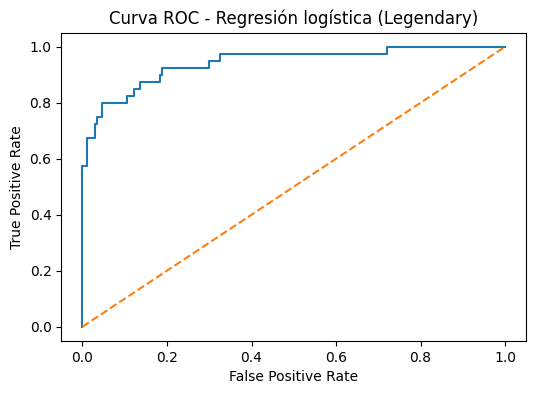

,Variable,Coeficiente
3,Special Attack,0.051360
1,Attack,0.042228
4,Special Defense,0.034292
2,Defense,0.029239
0,Health,0.021477
6,Weight (hg),0.000254
7,Catch Rate,-0.016752
5,Height (dm),-0.036890
9,Number of Evolution,-0.266640
8,Evolution Stage,-1.778233


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
df = pd.read_csv("pokemon.csv")

# Selección de variables numéricas para correlación
num_cols = [
    "Health", "Attack", "Defense",
    "Special Attack", "Special Defense",
    "Speed", "Base Stat Total",
    "Height (dm)", "Weight (hg)", "Catch Rate",
    "Evolution Stage", "Number of Evolution"
]

corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

# Correlación con el target (Speed)
corr_target = corr["Speed"].sort_values(ascending=False)
corr_target

# Seleccionar top variables más correlacionadas con Speed (excluyendo Speed)
top_predictors = corr_target.drop("Speed").head(3).index.tolist()
top_predictors

# Scatter plots: predictor vs Speed
for col in top_predictors:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="Speed", alpha=0.6)
    plt.title(f"Relación entre {col} y Speed")
    plt.show()
    
# Variables predictoras para regresión lineal (solo numéricas para empezar)
X = df[[
    "Health", "Attack", "Defense",
    "Special Attack", "Special Defense",
    "Height (dm)", "Weight (hg)", "Catch Rate",
    "Evolution Stage", "Number of Evolution"
]]
y = df["Speed"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2, rmse

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": lin_model.coef_
}).sort_values("Coeficiente", ascending=False)
coef_df

# Cálculo de residuos
residuals = y_test - y_pred

# Distribución de residuos
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribución de residuos (Speed)")
plt.xlabel("Residuo")
plt.show()

# Residuos vs valores predichos
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.title("Residuos vs valores predichos")
plt.xlabel("Speed predicha")
plt.ylabel("Residuo")
plt.show()

# X: usamos las mismas predictoras numéricas
X_log = X.copy()

# y: variable binaria
y_log = df["Legendary Status"].astype(int)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_l, y_train_l)

y_pred_l = log_model.predict(X_test_l)
y_proba_l = log_model.predict_proba(X_test_l)[:, 1]

acc = accuracy_score(y_test_l, y_pred_l)
cm = confusion_matrix(y_test_l, y_pred_l)
roc_auc = roc_auc_score(y_test_l, y_proba_l)
acc, roc_auc, cm

print(classification_report(y_test_l, y_pred_l))

fpr, tpr, _ = roc_curve(y_test_l, y_proba_l)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.title("Curva ROC - Regresión logística (Legendary)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

log_coef_df = pd.DataFrame({
    "Variable": X_log.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values("Coeficiente", ascending=False)
log_coef_df


------ Análisis de correlación ------

A partir de la matriz de correlación se observa que la variable objetivo Speed mantiene relaciones positivas moderadas con varias variables del dataset. Destaca especialmente la correlación con Base Stat Total, lo cual resulta bastante lógico, ya que los Pokémon con mejores estadísticas globales suelen presentar también valores elevados de velocidad.

También se aprecia una correlación positiva, aunque más débil, entre Speed y variables ofensivas como Attack y Special Attack. En cambio, variables defensivas como Defense muestran una relación baja o incluso ligeramente negativa con la velocidad. Por otro lado, Catch Rate presenta una correlación claramente negativa, lo que encaja con el hecho de que los Pokémon más rápidos y poderosos suelen ser más difíciles de capturar.

------ Relaciones bivariantes ------

Los diagramas de dispersión confirman visualmente estas relaciones. En el caso de Base Stat Total se observa una tendencia positiva clara con Speed, aunque con bastante dispersión, lo que indica que no se trata de una relación determinista. En los casos de Attack y Special Attack, la nube de puntos es más difusa, reforzando la idea de que la velocidad depende de múltiples factores y no de una única estadística.

------ Regresión lineal ------

Para la regresión lineal se ha tomado Speed como variable objetivo y varias variables numéricas como predictoras. El modelo obtenido presenta una capacidad predictiva moderada: consigue explicar parte de la variabilidad de la velocidad, aunque queda una proporción importante sin capturar, lo que sugiere que el fenómeno es más complejo de lo que puede recoger un modelo lineal simple.

El análisis de los coeficientes muestra que variables como Special Attack y Attack tienen un efecto positivo sobre la velocidad, mientras que variables relacionadas con la evolución, como Evolution Stage o Number of Evolution, presentan coeficientes negativos. Esto sugiere que los Pokémon en fases evolutivas más avanzadas tienden, en general, a ser menos rápidos, algo coherente con la lógica del juego.

------ Diagnóstico del modelo lineal ------

El estudio de los residuos indica que estos se distribuyen aproximadamente alrededor de cero, aunque no siguen una distribución perfectamente normal. El gráfico de residuos frente a valores predichos no muestra patrones claros, lo que sugiere que la relación lineal es razonable, si bien se observa cierta variabilidad mayor en valores altos de Speed. En conjunto, los supuestos del modelo se cumplen de forma aceptable, aunque no de manera estricta.

------ Regresión logística ------

Para la regresión logística se ha utilizado Legendary Status como variable objetivo. Este modelo resulta adecuado, ya que se trata de una variable binaria y el objetivo es clasificar a los Pokémon como legendarios o no.

Los resultados muestran un buen rendimiento del modelo, con valores elevados de accuracy y AUC, lo que indica que el modelo es capaz de discriminar correctamente entre ambas clases. La curva ROC confirma visualmente este buen comportamiento, situándose claramente por encima de la línea de referencia.

------ Comparación de modelos y conclusión ------

Ambos modelos cumplen funciones distintas dentro del análisis. La regresión lineal permite analizar e interpretar la relación entre las distintas estadísticas y la velocidad, aunque su capacidad predictiva es limitada. En cambio, la regresión logística resulta más adecuada cuando el objetivo es la clasificación, mostrando un rendimiento más sólido en el caso del estado legendario.

En conjunto, el uso combinado de ambos enfoques permite tanto explorar las relaciones entre variables como realizar predicciones razonables dentro del contexto del dataset.

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 4.1046983135241195
Pendiente estimada: 2.865830228239851


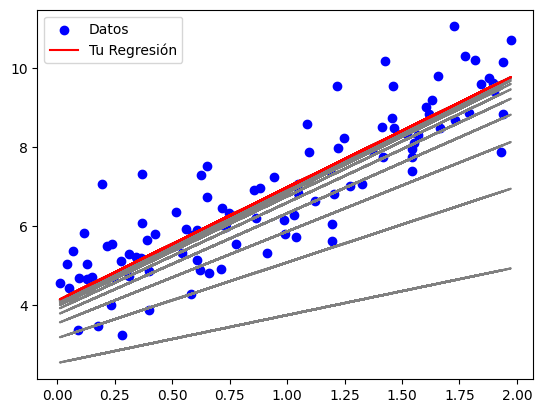

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    # TU CÓDIGO AQUÍ
    #Generacion aleatoria de parametros (numpy)
    w = ...
    b = ...

    for i in range(1, iteraciones):
        # calcular el error

        error = ...

        #Ajustar parametros
        dw = ...
        db = ...

        w = ...
        b = ...


        #pintar recta

        pintar_recta(b, w, X, y)

    return b, w


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# TU CÓDIGO AQUÍ

# 1. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 2. Resampleo Mensual
monthly_sales = ...

# 3. Media Móvil
ts_df['Moving_Avg'] = ...

# 4. Descomposición
# result = seasonal_decompose(..., model='additive', period=...)
# result.plot()
# plt.show()
